In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('C:/Users/lenovo/Downloads/Advertising.csv')

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
X=df.drop('sales',axis=1)

In [9]:
y=df['sales']

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [12]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [13]:
poly_features=polynomial_converter.transform(X)

In [14]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [15]:
poly_features.shape #extra 6 values from x1*x2,x2*x3,x3*x1 and squares of three.

(200, 9)

In [16]:
X.shape

(200, 3)

In [17]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [18]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()

In [26]:
model

LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

In [28]:
test_predictions=model.predict(X_test)

In [29]:
test_predictions

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [31]:
#model.coef_

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
MAE=mean_absolute_error(y_test,test_predictions)

In [35]:
MSE=mean_squared_error(y_test,test_predictions)

In [36]:
RMSE=np.sqrt(MSE)

In [38]:
RMSE

0.6646431757269196

In [39]:
MSE

0.4417505510403648

In [40]:
MAE

0.48967980448037

In [41]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [42]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [43]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [44]:
#create different order poly
#split poly feature train/test
#fit on train
#store/save the rmse fro BOTH the train AND test
#PLOT the results(error vs ploy order)

In [47]:
train_rmse_errors=[]
test_rmse_errors=[]

for d in range(1,10):
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)    
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    
    train_rmse=np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse=np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [52]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902067,
 0.35170836883993534,
 0.2509342952029336,
 0.19933332834273104,
 5.4214215994181805,
 0.14237972100695595,
 0.16675080548552418]

In [53]:
test_rmse_errors

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825231453,
 0.5077742624232109,
 2.5758247603435955,
 4.490868529265006,
 1381.404235838588,
 4449.5681972303655,
 95893.0265813161]

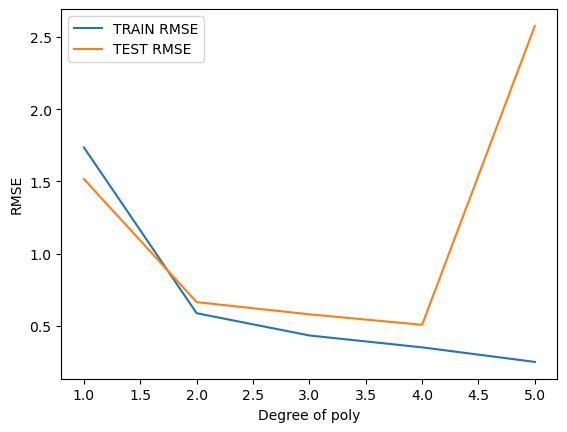

In [60]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')

plt.xlabel('Degree of poly')
plt.ylabel('RMSE')
plt.legend()

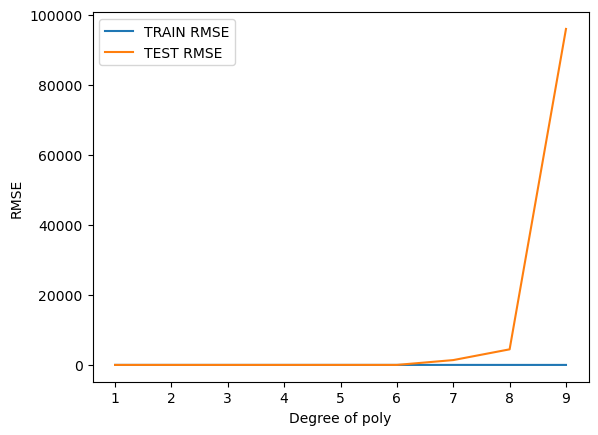

In [62]:
# tends to 0 going towards overfitting
plt.plot(range(1,10),train_rmse_errors,label='TRAIN RMSE')
plt.plot(range(1,10),test_rmse_errors,label='TEST RMSE')

plt.xlabel('Degree of poly')
plt.ylabel('RMSE')
plt.legend()

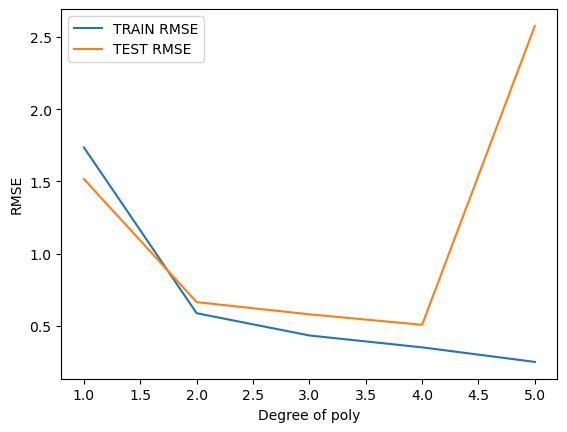

In [63]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')

plt.xlabel('Degree of poly')
plt.ylabel('RMSE')
plt.legend()

In [64]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [65]:
final_model=LinearRegression()

In [66]:
full_converted_X=final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [67]:
from joblib import dump,load

In [68]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [69]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [70]:
loaded_converter=load('final_converter.joblib')

In [71]:
loaded_model=load('final_poly_model.joblib')

In [73]:
campaign=[[149,22,12]]

In [74]:
loaded_converter.fit_transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [75]:
loaded_converter.fit_transform(campaign).shape

(1, 19)

In [76]:
transformed_data=loaded_converter.fit_transform(campaign)

In [77]:
loaded_model.predict(transformed_data)

array([14.64501014])